In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + TRIPADVISORS + VISITOR ATTENTION INDEX - DATA COMPOSITION 4 (Fixed Set Test).csv')
df.head(5)

,Monthly,Tourist Arrival,Number of Posts,Number of Comments,Airbnb Vietnam,Vietnam restaurant,Shopping in Hanoi,Shopping in Ho Chi Minh,Vietnam tour,Skyscanner,...,Hoi An,Vietnam weather,Visa for Vietnam,Sgn airport,Phu Quoc,Vietnam itinerary,Vietnam trip,Things to do in Hue,Vietnam backpackers,Class
0,01/01/2008,399556,403,3049,11,59,32,8,58,7,...,27,58,29,18,20,0,32,0,8,Train
1,01/02/2008,411032,357,3211,0,51,0,0,46,6,...,27,58,31,10,19,5,39,7,5,Train
2,01/03/2008,414332,344,3153,0,57,7,24,58,6,...,27,50,29,38,28,6,30,0,0,Train
3,01/04/2008,395900,338,3184,0,51,6,9,58,6,...,27,41,30,25,22,8,45,0,8,Train
4,01/05/2008,366387,369,2964,0,57,0,7,57,6,...,27,44,24,16,22,5,47,0,9,Train


In [3]:
import datetime
df['Monthly'] = pd.to_datetime(df['Monthly'])
df['Monthly'] = df['Monthly'].dt.strftime('%d.%m.%Y')
df['Monthly'] = pd.DatetimeIndex(df['Monthly']).dayofyear

In [4]:
X=df.drop('Tourist Arrival', axis=1)
y=df['Tourist Arrival']

In [5]:
train = df[df["Class"] == "Train"]
validation = df[df["Class"] == "Validation"]
test = df[df["Class"] == "Test"]
print(train.shape)
print(validation.shape)
print(test.shape)

(133, 24)
(12, 24)
(41, 24)


In [6]:
train = train.drop(['Class'], axis=1)
validation = validation.drop(['Class'], axis=1)
test = test.drop(['Class'], axis=1)

In [7]:
target_column_train = ['Tourist Arrival']
predictors_train = list(set(list(train.columns))-set(target_column_train))

x_train = train[predictors_train].values
y_train = train[target_column_train].values

print(x_train.shape)
print(y_train.shape)

(133, 22)
(133, 1)


In [8]:
target_column_validation = ['Tourist Arrival'] 
predictors_validation = list(set(list(validation.columns))-set(target_column_validation))

x_validation = validation[predictors_validation].values
y_validation = validation[target_column_validation].values

print(x_validation.shape)
print(y_validation.shape)

(12, 22)
(12, 1)


In [9]:
target_column_test = ['Tourist Arrival'] 
predictors_test = list(set(list(test.columns))-set(target_column_test))

x_test = test[predictors_test].values
y_test = test[target_column_test].values

print(x_test.shape)
print(y_test.shape)

(41, 22)
(41, 1)


In [10]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [11]:
# Number Of Trees In The Random Forest
n_estimators = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
# Number Of Features In Consideration At Every Split
max_features = ['auto', 'sqrt'] 
# Maximum Number Of Levels Allowed In Each Decision Tree
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] 
# Minimum Sample Number To Split A Node
min_samples_split = [2,3,5,6,8,9,10,12]
# Minimum Sample Number That Can Be Stored In A Leaf Node
min_samples_leaf = [1,2,3,4,5,6,8,9] 
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [12]:
# Use The Random Grid To Search For Best Hyperparameters
# First Create The Base Model To Tune
rf = RandomForestRegressor()

In [13]:
# Random search of parameters, using 3 fold cross validation, 
# Search across 100 different combinations, and use all available cores
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [14]:
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y wa

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             8, 9],
                                        'min_samples_split': [2, 3, 5, 6, 8, 9,
                                                              10, 12],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
               

In [15]:
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Best Parameters:  {'n_estimators': 1600, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}  



In [13]:
randmf = RandomForestRegressor(n_estimators = 1600, min_samples_split = 10, min_samples_leaf= 2, max_features = 'sqrt', max_depth= 30, bootstrap=False) 
randmf.fit(x_train, y_train) 

/var/folders/w4/3f8pkphx2j78qktgvt5lpdvw0000gn/T/ipykernel_3430/153080814.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randmf.fit(x_train, y_train)


RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=10,
                      n_estimators=1600)

In [14]:
randmf.score(x_validation, y_validation)

-2.0547458152052456

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [16]:
y_pred=randmf.predict(x_test)
print(y_pred)

[1.09928326e+06 1.00341337e+06 1.00875891e+06 1.18444527e+06
 1.24087652e+06 1.13074378e+06 1.27638823e+06 1.25058072e+06
 1.22325822e+06 1.32617458e+06 8.76619838e+05 3.73689505e+05
 4.11133594e+01 1.78014844e+01 1.78014844e+01 2.42198005e+03
 1.06703923e+03 5.61946380e+02 7.38575996e+03 3.08768504e+03
 5.38634505e+02 5.04194111e+04 2.20138943e+03 6.44252344e+01
 1.06548659e+05 1.87319258e+05 4.17777309e+05 5.68319615e+05
 6.72153901e+05 7.42483928e+05 7.45544000e+05 7.84980438e+05
 8.13123360e+05 8.84811881e+05 9.56000660e+05 1.08067700e+06
 1.06580742e+06 1.02092743e+06 9.22007839e+05 1.03036778e+06
 9.60466465e+05]


In [17]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 275291.6722522995


In [18]:
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 204300.23165720978


In [19]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 1.663010346386554e+18


In [20]:
def SMAPE(y_test,y_pred):
    return 100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
result = SMAPE(y_test,y_pred)
print("SMAPE :", result)

SMAPE : 5441.58598656188


In [21]:
def RMSPE(y_test, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100
result1 = RMSPE(y_test,y_pred)
print("RMSPE :", result1)

RMSPE : inf


/var/folders/w4/3f8pkphx2j78qktgvt5lpdvw0000gn/T/ipykernel_3430/2542154612.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100


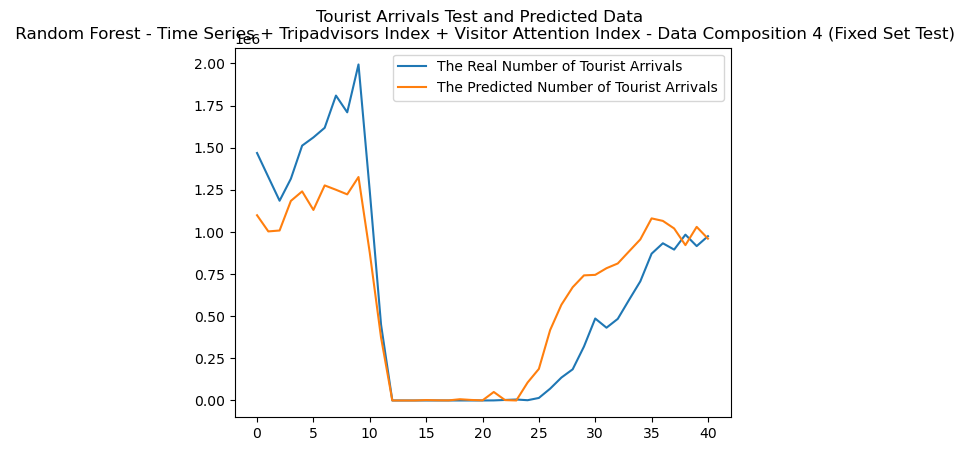

In [22]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n Random Forest - Time Series + Tripadvisors Index + Visitor Attention Index - Data Composition 4 (Fixed Set Test)")
plt.legend()
plt.show()